In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os
from tqdm import tqdm

In [4]:
data = np.array([
    [0.000103, 0.000846, 0.017366, 0.181574],
    [0.000555, 0.006125, 0.044396, 0.413093],
    [0.000518, 0.005058, 0.043199, 0.374945],
    [0.000029, 0.001715, 0.003285, 0.035864],
    [0.001772, 0.025511, 1.492746, 5.599526]
])

data2 = np.array([
    [0.000103, 0.000846, 0.017366, 0.181574],
    [0.000555, 0.006125, 0.044396, 0.413093],
    [0.000518, 0.005058, 0.043199, 0.374945],
    [0.000029, 0.001715, 0.003285, 0.035864],
    [0.000046, 0.001159, 0.005349, 0.048135]
])

labels = [
    "MLX",
    "Tyxml",
    "Tyxml percent",
    "Dream html",
    "Dream eml"
]

volume = np.array([
    1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000
])
# volumes = np.array([
#     [100, 1000, 10000, 100000],
#     [100, 1000, 10000, 100000],
#     [100, 1000, 10000, 100000],
#     [100, 1000, 10000, 100000],
#     [100, 1000, 10000, 100000]
# ])

colors = ['b', 'g', 'r', 'c', 'm']

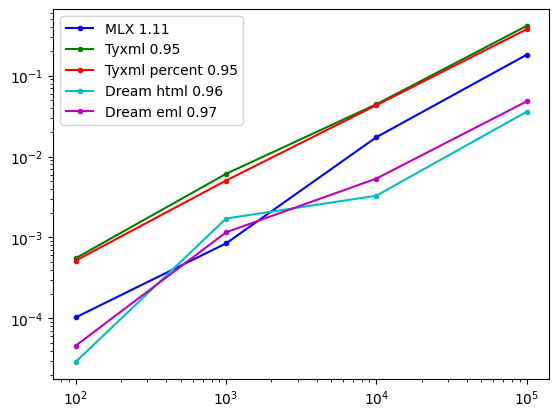

In [5]:
def graph_perfomance(data, labels, volumes, colors):
    plt.yscale('log')
    plt.xscale('log')
    for i in range(0, 5):
        k, _ = np.polyfit(np.log(volumes[i]), np.log(data[i]), deg=1)
        plt.plot(volumes[i], data[i], marker=".", color=colors[i], label=f'{labels[i]} {k:.2f}')
    plt.legend()
    plt.savefig('perfomance.png')
    plt.show()

graph_perfomance(data2, labels, volumes, colors)

In [12]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = [
    "Dream eml",
    "Dream html",
    "MLX",
    "Tyxml",
    "Tyxml percent"
]

volumes = np.array([
    1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000
])

In [9]:
MAX_RETIRES = 10

data = []
for epoch in tqdm(range(MAX_RETIRES)):
    proc = subprocess.run('eval $(opam env) && dune exec ../stress.exe',
                                    shell=True, cwd=os.getcwd(), capture_output=True)
    subdata = np.array(list(map(float, proc.stdout.decode('utf-8').split()))).reshape((len(volumes), 5)).T
    data.append(subdata)

data = np.array(data).mean(axis=0)

 10%|█         | 1/10 [00:17<02:34, 17.22s/it]

[[6.000000e-06 8.000000e-06 1.200000e-05 2.900000e-05 4.770000e-04
  6.800000e-05 6.400000e-04 6.600000e-04 1.460000e-03 2.750000e-03
  4.507000e-03 9.762000e-03 1.663500e-02 3.070400e-02 6.795800e-02
  1.426830e-01 2.432440e-01 6.000350e-01 1.245224e+00]
 [5.000000e-06 4.000000e-06 6.000000e-06 1.000000e-05 1.300000e-05
  2.600000e-05 5.000000e-05 1.020000e-04 2.270000e-04 4.610000e-04
  1.953000e-03 4.585000e-03 7.857000e-03 1.784000e-02 4.873200e-02
  1.138750e-01 2.530190e-01 9.984090e-01 3.121746e+00]
 [3.000000e-06 2.000000e-06 5.000000e-06 7.000000e-06 7.000000e-06
  1.500000e-05 3.000000e-05 5.000000e-05 1.150000e-04 3.000000e-04
  5.370000e-04 2.492000e-03 5.485000e-03 1.097800e-02 3.026900e-02
  6.996400e-02 1.109520e-01 2.847420e-01 6.081870e-01]
 [1.800000e-05 1.600000e-05 2.400000e-05 4.100000e-05 3.300000e-05
  7.400000e-05 1.430000e-04 7.510000e-04 1.499000e-03 1.892000e-03
  3.624000e-03 9.666000e-03 1.955700e-02 3.982300e-02 1.007600e-01
  2.189480e-01 4.123740e-01 1.0

 20%|██        | 2/10 [00:34<02:17, 17.22s/it]

[[5.5000000e-06 7.5000000e-06 1.1500000e-05 2.4000000e-05 4.6000000e-04
  1.2050000e-04 6.3750000e-04 7.0850000e-04 1.5255000e-03 2.9205000e-03
  4.3875000e-03 9.8305000e-03 1.6242000e-02 3.0151500e-02 6.6238000e-02
  1.4098050e-01 2.4254550e-01 5.9601700e-01 1.2562345e+00]
 [4.5000000e-06 4.0000000e-06 6.0000000e-06 9.5000000e-06 1.3500000e-05
  2.7500000e-05 5.3000000e-05 1.0300000e-04 2.4400000e-04 4.6300000e-04
  2.2645000e-03 4.3470000e-03 9.2365000e-03 1.6793000e-02 4.7402500e-02
  1.1605200e-01 2.5505900e-01 1.0061890e+00 3.1483105e+00]
 [2.5000000e-06 2.0000000e-06 4.5000000e-06 7.0000000e-06 7.5000000e-06
  1.6500000e-05 3.2000000e-05 5.1000000e-05 1.5900000e-04 3.0500000e-04
  5.8950000e-04 2.5020000e-03 5.6775000e-03 1.0946000e-02 2.9549500e-02
  6.3335500e-02 1.1170350e-01 2.8314100e-01 6.0623200e-01]
 [1.7000000e-05 1.5500000e-05 2.3500000e-05 3.9500000e-05 3.8000000e-05
  7.7500000e-05 1.5550000e-04 7.4450000e-04 1.4115000e-03 1.7375000e-03
  3.8405000e-03 1.0435000e-02 1

 30%|███       | 3/10 [00:52<02:03, 17.58s/it]

[[5.66666667e-06 7.00000000e-06 1.10000000e-05 2.26666667e-05
  4.26333333e-04 1.03666667e-04 6.27333333e-04 6.96666667e-04
  1.66966667e-03 2.85833333e-03 4.26300000e-03 9.87233333e-03
  1.63806667e-02 3.00740000e-02 6.58840000e-02 1.36392000e-01
  2.42552333e-01 5.95575000e-01 1.28709767e+00]
 [4.33333333e-06 4.00000000e-06 6.00000000e-06 9.66666667e-06
  1.26666667e-05 2.73333333e-05 5.50000000e-05 9.90000000e-05
  2.86000000e-04 4.65666667e-04 2.38333333e-03 4.26600000e-03
  8.94100000e-03 1.63316667e-02 4.80823333e-02 1.11428667e-01
  2.57189333e-01 1.02060167e+00 3.15087967e+00]
 [2.33333333e-06 2.00000000e-06 4.33333333e-06 6.66666667e-06
  7.33333333e-06 1.63333333e-05 3.33333333e-05 4.93333333e-05
  1.52666667e-04 2.83666667e-04 5.59666667e-04 2.69466667e-03
  5.82133333e-03 1.07756667e-02 2.94873333e-02 6.06333333e-02
  1.11924000e-01 2.95277667e-01 6.13465000e-01]
 [1.66666667e-05 1.50000000e-05 2.30000000e-05 3.83333333e-05
  3.53333333e-05 9.13333333e-05 1.63000000e-04 7.3

 40%|████      | 4/10 [01:10<01:45, 17.65s/it]

[[6.00000000e-06 8.00000000e-06 1.15000000e-05 2.25000000e-05
  4.12250000e-04 9.45000000e-05 6.29750000e-04 6.45750000e-04
  1.55250000e-03 2.77350000e-03 4.07575000e-03 9.62850000e-03
  1.66095000e-02 2.97432500e-02 6.57810000e-02 1.33475250e-01
  2.43401500e-01 6.10627000e-01 1.28171525e+00]
 [4.25000000e-06 3.75000000e-06 6.25000000e-06 1.00000000e-05
  1.25000000e-05 2.67500000e-05 5.40000000e-05 1.06750000e-04
  2.67500000e-04 5.11500000e-04 2.24525000e-03 4.33575000e-03
  8.77500000e-03 1.62675000e-02 4.86480000e-02 1.09518250e-01
  2.58170000e-01 1.02376025e+00 3.15405025e+00]
 [2.50000000e-06 2.25000000e-06 4.25000000e-06 6.50000000e-06
  7.00000000e-06 1.65000000e-05 3.32500000e-05 6.15000000e-05
  1.41500000e-04 2.85500000e-04 5.39750000e-04 2.68800000e-03
  5.79650000e-03 1.08242500e-02 2.94822500e-02 6.00000000e-02
  1.12502000e-01 2.94339000e-01 6.15930250e-01]
 [1.70000000e-05 1.50000000e-05 2.32500000e-05 3.90000000e-05
  3.47500000e-05 8.70000000e-05 1.61000000e-04 7.3

 50%|█████     | 5/10 [01:27<01:28, 17.63s/it]

[[7.4000000e-06 1.1400000e-05 1.3000000e-05 2.5000000e-05 4.8940000e-04
  1.0100000e-04 6.9840000e-04 7.2340000e-04 1.7580000e-03 3.0094000e-03
  4.0690000e-03 9.7150000e-03 1.7449000e-02 2.9821400e-02 6.8679800e-02
  1.3212980e-01 2.4454320e-01 6.0912340e-01 1.2789338e+00]
 [5.2000000e-06 4.4000000e-06 7.2000000e-06 1.1800000e-05 1.4800000e-05
  3.5200000e-05 6.2600000e-05 1.1920000e-04 3.1260000e-04 5.9900000e-04
  2.2324000e-03 4.5130000e-03 8.7134000e-03 1.6658800e-02 5.1461800e-02
  1.0853800e-01 2.6290600e-01 1.0217014e+00 3.1731018e+00]
 [3.0000000e-06 2.6000000e-06 4.8000000e-06 7.6000000e-06 8.2000000e-06
  1.9000000e-05 3.8200000e-05 6.7400000e-05 1.5720000e-04 2.9360000e-04
  5.5240000e-04 2.6822000e-03 6.0504000e-03 1.1091800e-02 2.9733400e-02
  5.9344800e-02 1.1568080e-01 2.9208640e-01 6.1560100e-01]
 [1.9600000e-05 1.7400000e-05 2.7400000e-05 4.6800000e-05 4.1200000e-05
  1.0080000e-04 1.8460000e-04 8.3700000e-04 1.5094000e-03 1.9452000e-03
  4.0870000e-03 1.1745000e-02 1

 60%|██████    | 6/10 [01:54<01:23, 20.88s/it]

[[7.50000000e-06 1.11666667e-05 1.35000000e-05 2.55000000e-05
  5.23500000e-04 1.01166667e-04 7.15833333e-04 7.48166667e-04
  1.76016667e-03 3.33000000e-03 4.33366667e-03 1.01573333e-02
  1.78816667e-02 3.07201667e-02 7.04930000e-02 1.34256000e-01
  2.63155500e-01 6.61864333e-01 1.40645383e+00]
 [5.00000000e-06 4.33333333e-06 7.33333333e-06 1.21666667e-05
  1.55000000e-05 3.65000000e-05 6.43333333e-05 1.22333333e-04
  3.13000000e-04 6.43833333e-04 2.30383333e-03 4.80100000e-03
  9.17183333e-03 1.73531667e-02 5.24666667e-02 1.14352667e-01
  2.86226000e-01 1.14025083e+00 3.54959117e+00]
 [3.16666667e-06 2.83333333e-06 4.66666667e-06 8.00000000e-06
  8.66666667e-06 2.21666667e-05 3.91666667e-05 6.75000000e-05
  1.58166667e-04 3.07000000e-04 5.80500000e-04 2.78583333e-03
  6.29050000e-03 1.15316667e-02 3.08228333e-02 6.16988333e-02
  1.25517667e-01 3.23143833e-01 6.79036000e-01]
 [2.00000000e-05 1.78333333e-05 2.88333333e-05 4.83333333e-05
  4.33333333e-05 1.11333333e-04 1.89833333e-04 8.4

 70%|███████   | 7/10 [02:14<01:01, 20.34s/it]

[[9.14285714e-06 1.38571429e-05 1.60000000e-05 2.68571429e-05
  5.67428571e-04 1.04142857e-04 7.43571429e-04 7.74142857e-04
  1.85471429e-03 3.51985714e-03 4.58742857e-03 1.06235714e-02
  1.85787143e-02 3.19741429e-02 7.23915714e-02 1.36631429e-01
  2.63907429e-01 6.66456286e-01 1.38337071e+00]
 [5.85714286e-06 4.71428571e-06 8.57142857e-06 1.28571429e-05
  1.64285714e-05 3.75714286e-05 6.77142857e-05 1.28571429e-04
  3.22714286e-04 6.62000000e-04 2.40914286e-03 4.97371429e-03
  9.72657143e-03 1.81654286e-02 5.33721429e-02 1.18003429e-01
  2.85744000e-01 1.18290771e+00 3.49336700e+00]
 [3.71428571e-06 3.14285714e-06 5.14285714e-06 8.57142857e-06
  9.14285714e-06 2.30000000e-05 4.17142857e-05 6.90000000e-05
  1.63285714e-04 3.20142857e-04 6.17714286e-04 2.88985714e-03
  6.56385714e-03 1.19890000e-02 3.16091429e-02 6.33187143e-02
  1.24593000e-01 3.44147429e-01 6.69369429e-01]
 [2.31428571e-05 1.88571429e-05 3.10000000e-05 5.12857143e-05
  4.61428571e-05 1.15142857e-04 1.98000000e-04 8.7

 80%|████████  | 8/10 [02:31<00:38, 19.21s/it]

[[8.87500000e-06 1.82500000e-05 1.53750000e-05 2.58750000e-05
  5.75625000e-04 1.01250000e-04 7.10500000e-04 7.56750000e-04
  1.78475000e-03 3.42950000e-03 4.48325000e-03 1.03177500e-02
  1.94478750e-02 3.15812500e-02 7.15003750e-02 1.34745250e-01
  2.60738875e-01 6.56820125e-01 1.36387988e+00]
 [5.75000000e-06 4.50000000e-06 8.12500000e-06 1.25000000e-05
  1.63750000e-05 3.62500000e-05 6.56250000e-05 1.23375000e-04
  3.23375000e-04 6.40875000e-04 2.34512500e-03 4.94937500e-03
  9.63200000e-03 1.81612500e-02 5.26663750e-02 1.15885000e-01
  2.81887500e-01 1.15632725e+00 3.44517638e+00]
 [3.62500000e-06 3.00000000e-06 5.00000000e-06 8.25000000e-06
  9.12500000e-06 2.40000000e-05 4.03750000e-05 6.61250000e-05
  1.68000000e-04 3.20875000e-04 6.50250000e-04 2.92775000e-03
  6.65575000e-03 1.18746250e-02 3.13357500e-02 6.25881250e-02
  1.22994250e-01 3.36879875e-01 6.62083375e-01]
 [2.76250000e-05 1.83750000e-05 3.00000000e-05 4.95000000e-05
  4.52500000e-05 1.15875000e-04 2.09250000e-04 8.3

 90%|█████████ | 9/10 [02:55<00:21, 21.01s/it]

[[8.55555556e-06 1.74444444e-05 1.50000000e-05 2.50000000e-05
  5.51444444e-04 9.73333333e-05 6.85888889e-04 7.28444444e-04
  1.73455556e-03 3.38311111e-03 4.38333333e-03 1.02312222e-02
  1.90028889e-02 3.12167778e-02 7.08217778e-02 1.33461889e-01
  2.58593667e-01 6.54455889e-01 1.42738156e+00]
 [5.55555556e-06 4.44444444e-06 8.00000000e-06 1.22222222e-05
  1.58888889e-05 3.51111111e-05 6.41111111e-05 1.19444444e-04
  3.14888889e-04 6.25222222e-04 2.36044444e-03 4.92233333e-03
  9.62900000e-03 1.79018889e-02 5.22320000e-02 1.14436000e-01
  2.82831667e-01 1.17711956e+00 3.67898544e+00]
 [3.55555556e-06 2.88888889e-06 5.00000000e-06 8.11111111e-06
  8.77777778e-06 2.31111111e-05 3.95555556e-05 6.36666667e-05
  1.63111111e-04 3.11222222e-04 6.46333333e-04 2.86333333e-03
  6.57811111e-03 1.17487778e-02 3.10278889e-02 6.16298889e-02
  1.22431000e-01 3.42415667e-01 6.90985444e-01]
 [2.63333333e-05 1.78888889e-05 2.92222222e-05 4.81111111e-05
  4.35555556e-05 1.11000000e-04 2.02333333e-04 8.3

100%|██████████| 10/10 [03:14<00:00, 19.42s/it]

[[8.8000000e-06 1.7500000e-05 1.5500000e-05 2.6100000e-05 5.6590000e-04
  9.9800000e-05 6.9930000e-04 7.8780000e-04 1.7919000e-03 3.4923000e-03
  4.5313000e-03 1.0514900e-02 1.9386300e-02 3.1996400e-02 7.2283900e-02
  1.3711470e-01 2.6209050e-01 6.5113350e-01 1.4070910e+00]
 [5.7000000e-06 4.6000000e-06 8.3000000e-06 1.2900000e-05 1.6400000e-05
  3.6400000e-05 6.6500000e-05 1.2390000e-04 3.2460000e-04 6.4940000e-04
  2.4326000e-03 5.1285000e-03 9.8951000e-03 1.8493800e-02 5.3139400e-02
  1.1742020e-01 2.8574760e-01 1.1631018e+00 3.6315904e+00]
 [3.6000000e-06 3.0000000e-06 5.3000000e-06 8.5000000e-06 9.1000000e-06
  2.3700000e-05 4.1100000e-05 6.5700000e-05 1.6760000e-04 3.2520000e-04
  6.6880000e-04 2.9686000e-03 6.7734000e-03 1.2131600e-02 3.1732400e-02
  6.2656100e-02 1.2290980e-01 3.3653180e-01 6.8258010e-01]
 [2.6700000e-05 1.8700000e-05 3.4300000e-05 5.0300000e-05 4.4900000e-05
  1.1310000e-04 2.0770000e-04 8.7170000e-04 1.6314000e-03 2.1813000e-03
  4.7543000e-03 1.2455200e-02 2

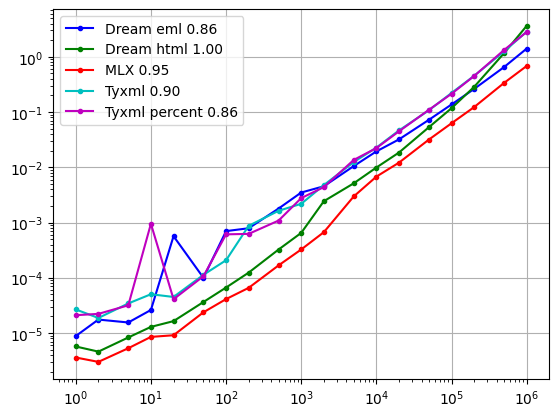

In [14]:
plt.yscale('log')
plt.xscale('log')
for color, label, d in zip(colors, labels, data):
    k, _ = np.polyfit(np.log(volumes), np.log(d), deg=1)
    plt.plot(volumes, d, marker=".", color=color, label=f'{label} {k:.2f}')
plt.legend()
plt.grid()
plt.show()

# after changing to pool

In [15]:
MAX_RETIRES = 10

data = []
for epoch in tqdm(range(MAX_RETIRES)):
    proc = subprocess.run('eval $(opam env) && dune exec ../stress.exe',
                                    shell=True, cwd=os.getcwd(), capture_output=True)
    subdata = np.array(list(map(float, proc.stdout.decode('utf-8').split()))).reshape((len(volumes), 5)).T
    data.append(subdata)

data = np.array(data).mean(axis=0)

100%|██████████| 10/10 [02:56<00:00, 17.65s/it]


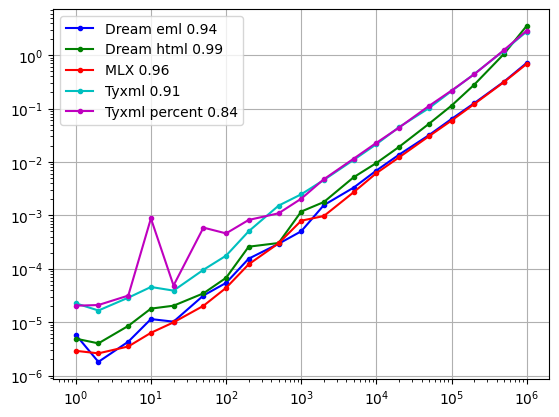

<Figure size 640x480 with 0 Axes>

In [17]:
plt.yscale('log')
plt.xscale('log')
for color, label, d in zip(colors, labels, data):
    k, _ = np.polyfit(np.log(volumes), np.log(d), deg=1)
    plt.plot(volumes, d, marker=".", color=color, label=f'{label} {k:.2f}')
plt.legend()
plt.grid()
plt.show()
plt.savefig("improved.png")